In [1]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("train.csv",index_col=False)


In [8]:
le = preprocessing.LabelEncoder()
train_labels=['Hour','Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus','Sensor_beta_plus', 'Sensor_gamma_plus']
#feature_encoded=le.fit_transform(train[train_labels])

for feat in train_labels:
    feature_encoded = le.fit_transform(train[feat].astype(str))
label_encoded=le.fit_transform(train['Insect'])

x_train, y_train = train_test_split(feature_encoded, label_encoded, random_state=0)

ValueError: too many values to unpack (expected 2)

In [12]:
train_labels=['Hour','Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus','Sensor_beta_plus', 'Sensor_gamma_plus']
x=train[train_labels]
y=train['Insect']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
model = RandomForestClassifier(n_estimators=200, max_depth=300, random_state=0)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output

model.score(x_test,y_test)

0.8886350656767561

In [22]:
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[824  58   9]
 [ 42 641   2]
 [ 73  11  91]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       891
           1       0.90      0.94      0.92       685
           2       0.89      0.52      0.66       175

    accuracy                           0.89      1751
   macro avg       0.89      0.79      0.83      1751
weighted avg       0.89      0.89      0.88      1751



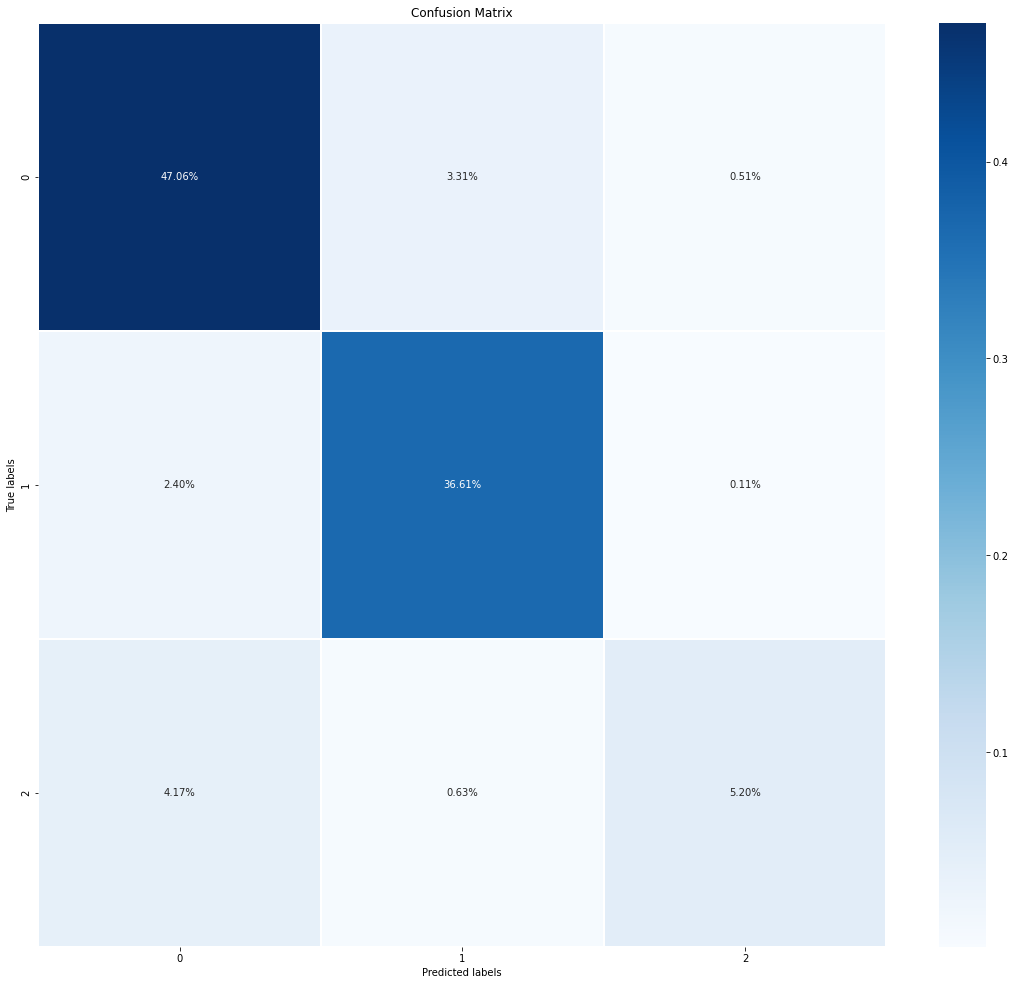

In [23]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 